In [2]:
using Pkg
# Pkg.activate("C:\\Research\\Encoder_Modeling\\Encoder_Analysis")

using Random
using StateSpaceDynamics
using Distributions
using Plots
using StatsBase
using CSV
using DataFrames
using LinearAlgebra
using MultivariateStats
using Glob
using Dates
include(".\\Zutils.jl")

# using StatsPlots

# For testing and debugging
Random.seed!(1234);

const SSD = StateSpaceDynamics

base_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\"
session_folders = filter(isdir, glob("*", base_path))

4-element Vector{String}:
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R1"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_M1"
 "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R16"

In [10]:
# session_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14_529_4thlick\\TD15d_2024_11_25_P1\\";
session_path = "C:\\Research\\Encoder_Modeling\\Encoder_Analysis\\Processed_Encoder\\R14\\TD1d_2023_02_21_P1\\";
prb=1;

if prb == 1
    println("Probe 1 Processing -> Check this!")
    Probe1_R1, Probe2_R1, PCA_P1_R1, PCA_P2_R1, KP_R1, Jaw_R1 = load_data_encoder_noSVD(session_path, "R1")
    Probe1_R4, Probe2_R4, PCA_P1_R4, PCA_P2_R4, KP_R4, Jaw_R4 = load_data_encoder_noSVD(session_path, "R4")

    Probe1_R1_Cut, Probe2_R1_Cut, PCA_P1_R1_Cut, PCA_P2_R1_Cut, KP_R1_Cut, FCs_R1, SCs_R1, LRCs_R1, Tongue_mat_R1, Jaw_R1_Cut = load_data_encoder_cut_noSVD(session_path, "R1")
    Probe1_R4_Cut, Probe2_R4_Cut, PCA_P1_R4_Cut, PCA_P2_R4_Cut, KP_R4_Cut, FCs_R4, SCs_R4, LRCs_R4, Tongue_mat_R4, Jaw_R4_Cut = load_data_encoder_cut_noSVD(session_path, "R4")
else
    println("Probe 2 Processing -> Check this!")
    Probe11_R1, Probe1_R1, PCA_P11_R1, PCA_P1_R1, KP_R1, Jaw_R1 = load_data_encoder_noSVD(session_path, "R1")
    Probe11_R4, Probe1_R4, PCA_P11_R4, PCA_P1_R4, KP_R4, Jaw_R4 = load_data_encoder_noSVD(session_path, "R4")

    Probe11_R1_Cut, Probe1_R1_Cut, PCA_P11_R1_Cut, PCA_P1_R1_Cut, KP_R1_Cut, FCs_R1, SCs_R1, LRCs_R1, Tongue_mat_R1, Jaw_R1_Cut = load_data_encoder_cut_noSVD(session_path, "R1")
    Probe11_R4_Cut, Probe1_R4_Cut, PCA_P11_R4_Cut, PCA_P1_R4_Cut, KP_R4_Cut, FCs_R4, SCs_R4, LRCs_R4, Tongue_mat_R4, Jaw_R4_Cut = load_data_encoder_cut_noSVD(session_path, "R4")
end

Probe 1 Processing -> Check this!


([[-0.46854 -0.49804 … -0.47416 -0.38527; -0.46854 -0.49804 … -0.47416 -0.38527; … ; -0.46854 42.361 … -0.47416 6.3413; -0.46854 73.839 … -0.47416 1.5719], [42.391 -0.49804 … -0.47416 -0.38527; 31.009 -0.49804 … -0.47416 -0.38527; … ; -0.46854 -0.49804 … -0.47416 -0.38527; -0.46854 -0.49804 … -0.47416 -0.38527], [-0.46854 -0.49804 … -0.47416 -0.38527; -0.46854 -0.49804 … -0.47416 -0.38527; … ; -0.46854 75.796 … -0.47416 -0.38527; -0.46854 47.959 … -0.47416 -0.38527], [1.4886 42.361 … -0.47416 -0.38527; -0.46854 30.98 … -0.47416 -0.38527; … ; 31.009 -0.49804 … -0.47416 -0.38527; 16.511 -0.49804 … -0.47416 -0.38527], [1.4886 16.481 … -0.47416 -0.38527; -0.46854 6.2286 … -0.47416 -0.38527; … ; -0.46854 49.088 … -0.47416 -0.38527; -0.46854 75.796 … -0.47416 -0.38527], [31.009 30.98 … -0.47416 -0.38527; 16.511 16.481 … -0.47416 -0.38527; … ; -0.46854 -0.49804 … -0.47416 -0.38527; -0.46854 -0.49804 … -0.47416 -0.38527], [16.511 -0.49804 … 42.385 -0.38527; 6.2581 -0.49804 … 31.004 -0.38527; …

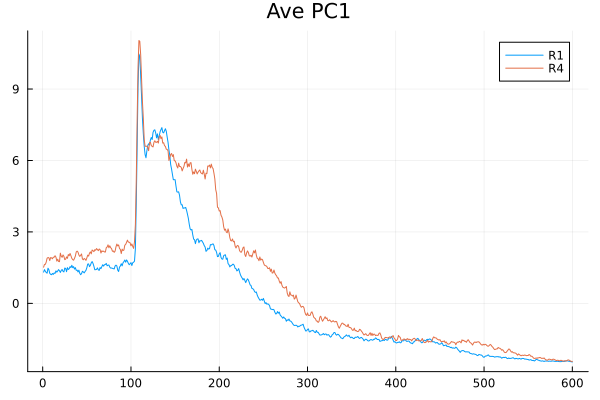

In [5]:
R1_Ave = average_PCs(PCA_P1_R1)
R4_Ave = average_PCs(PCA_P1_R4)
plot(R1_Ave[:,1], label="R1")
plot!(R4_Ave[:,1], label="R4")
title!("Ave PC1")

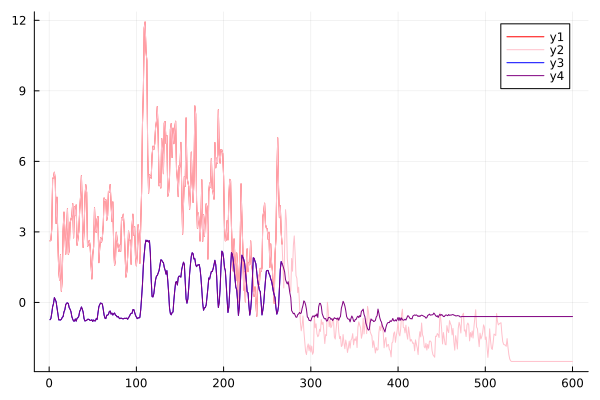

In [6]:
trial = 50
plot(PCA_P1_R4_Cut[trial][:,1], color=:red)
plot!(PCA_P1_R4[trial][:,1], color=:pink)

plot!(KP_R4_Cut[trial][:,10], color=:blue)
plot!(KP_R4[trial][:,10], color=:purple)

# plot!(Tongue_mat_R4[:,trial], color=:green)



In [11]:
"""
Remove NaN values
"""


# Assuming KP_R1 is a vector of matrices
for i in 1:length(KP_R1)
    # Replace NaN values in each matrix with 0
    KP_R1[i] .= replace(KP_R1[i], NaN => 0.0)
end

for i in 1:length(KP_R4)
    # Replace NaN values in each matrix with 0
    KP_R4[i] .= replace(KP_R4[i], NaN => 0.0)
end

# Assuming KP_R1 is a vector of matrices
for i in 1:length(KP_R1_Cut)
    # Replace NaN values in each matrix with 0
    KP_R1_Cut[i] .= replace(KP_R1_Cut[i], NaN => 0.0)
end

for i in 1:length(KP_R4_Cut)
    # Replace NaN values in each matrix with 0
    KP_R4_Cut[i] .= replace(KP_R4_Cut[i], NaN => 0.0)
end

In [5]:
"""
Omit certain kinematic features if necessary
"""

# 1:17, 20:24

KP_R4 = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R4]
KP_R1 = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R1]
KP_R4_Cut = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R4_Cut]
KP_R1_Cut = [dropdims(el[:, vcat(1:17, 20:24), :]; dims=3) for el in KP_R1_Cut]


161-element Vector{Matrix{Float64}}:
 [0.0070211 -0.075472 … -0.020332 -0.433; 0.0070211 -0.075472 … -0.020332 -0.28315; … ; -0.86453 -0.324 … -0.020332 0.65268; -0.06714 0.80863 … -0.43192 0.74845]
 [0.0070211 -0.075472 … -0.020332 0.88682; 0.0070211 -0.075472 … -0.020332 0.77366; … ; 0.0070211 -0.075472 … -0.020332 1.1967; 0.0070211 -0.075472 … 1.041 1.1828]
 [0.0070211 -0.075472 … -0.020332 0.24485; 0.0070211 -0.075472 … -0.020332 -0.17438; … ; -2.4663 -0.75416 … -0.52232 0.23807; -2.4087 -0.53799 … -0.84608 0.14697]
 [0.0070211 -0.075472 … -0.020332 0.95367; 0.0070211 -0.075472 … -0.020332 1.184; … ; 0.0070211 -3.5701 … 0.58068 1.1479; 0.0070211 -0.075472 … 0.8925 1.3825]
 [0.0070211 -0.075472 … -0.020332 0.053691; 0.0070211 -0.075472 … -0.020332 0.06323; … ; -4.3483 -2.6444 … -0.7253 -0.96884; -4.3633 -2.8554 … -0.8137 -0.75139]
 [0.0070211 -0.075472 … -0.020332 1.3883; 0.0070211 -0.075472 … -0.020332 1.3464; … ; -1.8726 -1.2109 … 0.2833 1.3616; -0.047549 -0.48106 … 0.26158 0.9276

In [12]:
"""
Prefit the encoder models
"""

println("Prefitting Encoders")
lags=4
leads = 0
start_time = 90
dif = 100-lags;

# Get enough data to create kernel and start at GC still
# X_R1 = [X[100-lags:end,:] for X in Jaw_R1]
# X_R4 = [X[100-lags:end,:] for X in Jaw_R4]

X_R1 = [X[start_time-lags+1:end,:] for X in KP_R1]
X_R4 = [X[start_time-lags+1:end,:] for X in KP_R4]


Y_R1 = [Y[start_time-lags+1:end, :] for Y in PCA_P1_R1]
Y_R4 = [Y[start_time-lags+1:end, :] for Y in PCA_P1_R4]

X_R1_kernel = kernelize_window_features(X_R1)
X_R4_kernel = kernelize_window_features(X_R4)

Y_R1_trimmed = kernelize_window_features(Y_R1)
Y_R4_trimmed = kernelize_window_features(Y_R4)


# Y_R1_trimmed = trim_Y_train_past(Y_R1)
# Y_R4_trimmed = trim_Y_train_past(Y_R4)

FCs_R4 = FCs_R4 .- start_time
FCs_R1 = FCs_R1 .- start_time

LRCs_R4 = LRCs_R4 .- start_time
LRCs_R1 = LRCs_R1 .- start_time

FCs = cat(FCs_R1, FCs_R4, dims=2)
LRCs= cat(LRCs_R1, LRCs_R4, dims=1)

X_R1 = [X_R1_kernel[i][(FCs_R1[i]-3):(FCs_R1[i]), :] for i in eachindex(X_R1_kernel)]
X_R4 = [X_R4_kernel[i][(FCs_R4[i]-3):(FCs_R4[i]+10), :] for i in eachindex(X_R4_kernel)]

Y_R1 = [Y_R1_trimmed[i][(FCs_R1[i]-3):(FCs_R1[i]), :] for i in eachindex(Y_R1_trimmed)]
Y_R4 = [Y_R4_trimmed[i][(FCs_R4[i]-3):(FCs_R4[i]+10), :] for i in eachindex(Y_R4_trimmed)]

X_eng = cat(X_R1, X_R4, dims=1)
Y_eng = cat(Y_R1, Y_R4, dims=1)

# X_eng = X_R1;
# Y_eng = Y_R1;


X_R1 = [X_R1_kernel[i][end-7:end, :] for i in eachindex(X_R1_kernel)]
X_R4 = [X_R4_kernel[i][end-7:end, :] for i in eachindex(X_R4_kernel)]

Y_R1 = [Y_R1_trimmed[i][end-7:end, :]  for i in eachindex(Y_R1_trimmed)]
Y_R4 = [Y_R4_trimmed[i][end-7:end, :]  for i in eachindex(Y_R4_trimmed)]


X_diseng = cat(X_R1, X_R4, dims=1)
Y_diseng = cat(Y_R1, Y_R4, dims=1)

# Prefit engaged model
X_eng = vcat(X_eng...)
Y_eng = vcat(Y_eng...)

β_eng, Σ_eng = weighted_ridge_regression(X_eng, Y_eng, 0.1)

# # # seems to be a problem with X
# X_diseng = vcat(X_diseng...)
# Y_diseng = vcat(Y_diseng...)

# β_diseng, Σ_diseng = weighted_ridge_regression(X_diseng, Y_diseng, 0.01)

Prefitting Encoders


([6.672537239565527 -1.1349651316265077 … 0.475549921066236 0.9008841009764121; -0.034917062673444695 -0.027260185491182143 … -0.062487908000924956 -0.037441334908531035; … ; 0.2610098781325746 -0.38400504140535086 … 0.015006127506102349 -0.0815084200126503; -0.06029297741607724 0.12144179428828873 … -0.012542629181696813 0.048011067065315896], [2.05858167644944 -0.3520923401189777 … 0.05484677190369216 0.03236538987512403; -0.3520923401189777 1.0541787738946697 … 0.04692055810569227 0.07034445907962363; … ; 0.05484677190369216 0.04692055810569227 … 0.6930345061052973 0.24767005888503094; 0.03236538987512403 0.07034445907962363 … 0.24767005888503094 1.0024932595580078])

Setting up switching model
A: [0.9999 0.0001; 0.0001 0.9999]
Iter: 1
A: [0.9581806967810382 0.04181930321896571; 0.01880325225783807 0.9811967477421613]
Iter: 2
A: [0.9628210633988062 0.03717893660119453; 0.015331706636231679 0.9846682933637677]
Iter: 3
A: [0.9674145794139603 0.032585420586042; 0.01294291317478007 0.9870570868252195]
Iter: 4
A: [0.9693535973859723 0.03064640261403099; 0.01202045497758794 0.9879795450224111]
Iter: 5
A: [0.9705138999494587 0.029486100050542075; 0.011502374462074009 0.9884976255379269]
Iter: 6
A: [0.97026858437551 0.02973141562448844; 0.011559768746955103 0.9884402312530444]
Iter: 7
A: [0.970065736290153 0.029934263709847527; 0.011640408966750887 0.9883595910332491]
Iter: 8
A: [0.9701713718744008 0.029828628125600064; 0.0115916502922021 0.9884083497077967]
Iter: 9
A: [0.9703037759098078 0.029696224090194817; 0.011538868771596072 0.988461131228404]
Iter: 10
A: [0.9703694939768164 0.0296305060231847; 0.011507802374795066 0.9884921976252041]
Iter: 11
A: [0.9

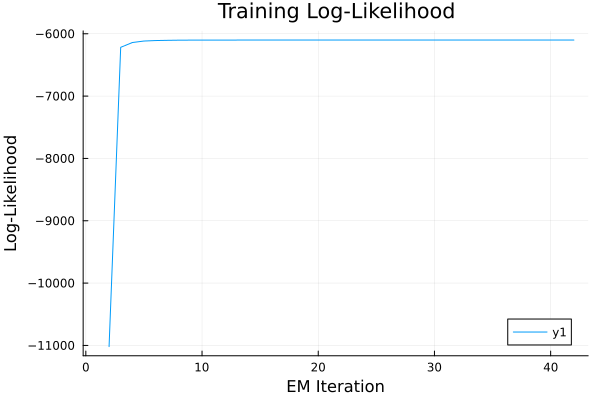

In [13]:
"""
Set up the switching encoder model
"""

println("Setting up switching model")

X_R1 = [X[start_time-lags:end,:] for X in KP_R1_Cut]
X_R4 = [X[start_time-lags:end,:] for X in KP_R4_Cut]
# X = cat(X_R1, X_R4, dims=1)

X = X_R1;
# deleteat!(X, 30)
# Y = cat(PCA_P1_R1_Cut, PCA_P1_R4_Cut, dims=1)
Y = PCA_P1_R1_Cut;

Y = [y[start_time-lags:end, :] for y in Y]
# deleteat!(Y, 30)

# X_ready = permutedims.(X_ready)
# Y_ready = permutedims.(Y_ready)

# X_ready = rand(size(X_ready)...)

X_kern = kernelize_window_features(X)
Y_trim = kernelize_window_features(Y)

# Y_trim = trim_Y_train_past(Y)

X_ready = permutedims.(X_kern)
Y_ready = permutedims.(Y_trim)
# Y_ready = [randn(size(y)) for y in Y_ready]


# Initialize the Gaussian HMM-GLM
model = SwitchingGaussianRegression(;K=2, input_dim=size(X_ready[1])[1], output_dim=size(Y_ready[1])[1], include_intercept=true)

model.B[1].β = β_eng
model.B[1].Σ = Σ_eng
model.B[1].λ = 0.1
model.B[2].λ = 0.1

# model.B[2].β = β_diseng
model.B[2].Σ = Σ_eng

model.A = [0.9999 0.0001; 0.0001 0.9999]
model.πₖ = [0.0001; 0.9999]

lls = fit_custom!(model, Y_ready, X_ready, max_iters=100)

plot(lls)
title!("Training Log-Likelihood")
xlabel!("EM Iteration")
ylabel!("Log-Likelihood")

In [14]:
diff(lls)

41-element Vector{Float64}:
   Inf
 4801.805796034255
   76.72302462420339
   23.97063817547314
    7.9025021172637935
    3.4494418805152236
    2.5176937593842013
    0.9029645388591234
    0.3299942791945796
    0.14356322438106872
    ⋮
    9.70807686826447e-5
    4.739093037642306e-5
    2.4273896997328848e-5
    1.2850646271544974e-5
    6.9511361289187334e-6
    3.8127045627334155e-6
    2.110823515977245e-6
    1.1761567293433473e-6
    6.585523806279525e-7

Calculating average inference


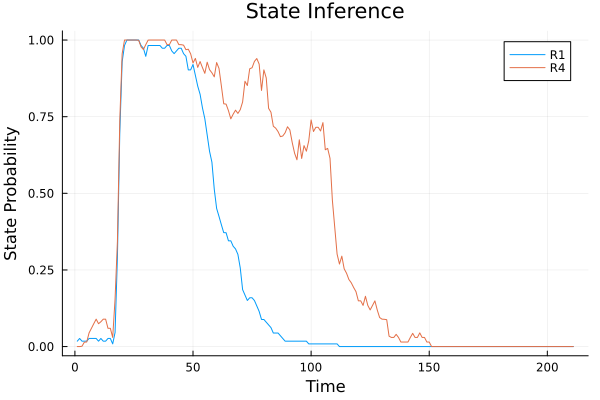

In [15]:
"""
Plot the trial averaged inference
"""

println("Calculating average inference")
X_R1 = [X[start_time-lags:300,:] for X in KP_R1]
X_R4 = [X[start_time-lags:300,:] for X in KP_R4]

Y_R1 = [Y[start_time-lags:300,:] for Y in PCA_P1_R1]
Y_R4 = [Y[start_time-lags:300, :] for Y in PCA_P1_R4]

X_R1_kernel = kernelize_window_features(X_R1)
X_R4_kernel = kernelize_window_features(X_R4)

Y_R1_trimmed = kernelize_window_features(Y_R1)
Y_R4_trimmed = kernelize_window_features(Y_R4)

# Y_R1_trimmed = trim_Y_train_past(Y_R1)
# Y_R4_trimmed = trim_Y_train_past(Y_R4)

YY = permutedims.(Y_R1_trimmed)
XX = permutedims.(X_R1_kernel)

YY_R4 = permutedims.(Y_R4_trimmed)
XX_R4 = permutedims.(X_R4_kernel)


FB_R1 = label_data(model, YY, XX);
FB_R4 = label_data(model, YY_R4, XX_R4);

V1 = SSD.viterbi(model, YY, XX);
V4 = SSD.viterbi(model, YY_R4, XX_R4);

# Extract γ[1, :] for each K in OO
γ_vectors_R1 = [FB_R1[K].γ[1, :] for K in eachindex(FB_R1)]
γ_mean_R1 = mean(exp.(hcat(γ_vectors_R1...)), dims=2)

γ_vectors_R4 = [FB_R4[K].γ[1, :] for K in eachindex(FB_R4)]
γ_mean_R4 = mean(exp.(hcat(γ_vectors_R4...)), dims=2)

plot(γ_mean_R1; label="R1")
plot!(γ_mean_R4; label="R4")
title!("State Inference")
ylabel!("State Probability")
xlabel!("Time")

In [16]:
"""
Look at single trial PC predictions
"""

Tongue_R1 = Tongue_mat_R1[start_time:300, :];
Tongue_R4 = Tongue_mat_R4[start_time:300, :];

# Save the data to export to MATLAB figure making
R4_Tongue = permutedims(hcat(Tongue_R4...))
R1_Tongue = permutedims(hcat(Tongue_R1...))
R4_States = permutedims(hcat(γ_vectors_R4...))
R1_States = permutedims(hcat(γ_vectors_R1...))

R4_Vit = permutedims(hcat(V4...))
R1_Vit = permutedims(hcat(V1...))

# Convert matrices to DataFrames, using :auto for column names (if you don't want specific column names)
Tongue_R4 = Tongue_R4[1:201, :];
Tongue_R1 = Tongue_R1[1:201, :];

R4_Tongue_df = DataFrame(permutedims(Tongue_R4), :auto)
R1_Tongue_df = DataFrame(permutedims(Tongue_R1), :auto)


# Get predictions at each time point from the correct emission model based on the state
trial = 10;

X_trial = X_R4_kernel[trial];
Y_trial = Y_R4_trimmed[trial];
T, D = size(X_trial)
_, O = size(Y_trial)  # O = output dimension

# Initialize prediction matrix
y_pred = zeros(T, O)

for i in 1:size(X_trial,1)
# Find the state
state = exp(R4_States[trial,i])

N, D = size(X_trial)
X_bias = hcat(ones(N), X_trial)  # Add intercept column
#    X_bias = X_trial

if state == 1.0
    y_pred[i,:] = (reshape(X_bias[i, :], 1,:) * model.B[1].β)
else
    y_pred[i,:] = (reshape(X_bias[i, :], 1,:) * model.B[2].β)
end
end

PC = 1
r2_score(Y_trial[:,PC], y_pred[:,PC])

0.49904530938852687

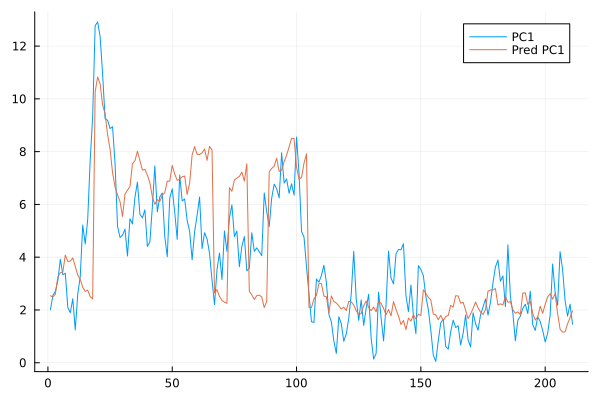

In [17]:
plot(Y_trial[:,PC], label="PC1")
plot!(y_pred[:,PC], label="Pred PC1")

In [12]:
"""
Calculate average PC prediction accuracy
"""

num_trials = length(X_R4_kernel)
_, O = size(Y_R4_trimmed[1])  # O = number of PCs (output dims)

# Initialize matrix to store R² scores (trials × PCs)
r2_scores = zeros(num_trials, O)

for trial in 1:num_trials
    X_trial = X_R4_kernel[trial]
    Y_trial = Y_R4_trimmed[trial]
    T, D = size(X_trial)

    # Initialize prediction matrix
    y_pred = zeros(T, O)

    # Add bias term (intercept)
    X_bias = hcat(ones(T), X_trial)

    for i in 1:T
        # Find the state (use exp because you stored log probs?)
        state = exp(R4_States[trial, i])

        if state == 1.0
            y_pred[i, :] = reshape(X_bias[i, :], 1, :) * model.B[1].β
        else
            y_pred[i, :] = reshape(X_bias[i, :], 1, :) * model.B[2].β
        end
    end

    # Now compute R² for each PC
    for pc in 1:O
        r2_scores[trial, pc] = r2_score(Y_trial[:, pc], y_pred[:, pc])
    end
end

mean_r2_per_pc = mean(r2_scores, dims=1)  # 1 × 12 matrix
mean_r2_per_pc = vec(mean_r2_per_pc)      # convert to 12-element Vector

50-element Vector{Float64}:
  0.3889578866606003
  0.3951960973450087
  0.006870286289983341
  0.09797059773072776
  0.2270127906060626
 -0.11757631437541183
 -0.07741044865334283
 -0.067920524044778
 -0.1033878862825552
 -0.036208135120804535
  ⋮
  0.4173450312751131
 -0.009342818843535721
  0.12727420015879687
  0.23621632523638292
 -0.10053194843616334
 -0.06520121137387674
 -0.06039116439749455
 -0.10571171113765376
 -0.04306621085772377

In [57]:
"""
Visualization of I/O + State Inference
"""

trial = 1
x = 1:length(R1_States[trial, :])

X_R1_trimmed = trim_Y_train_past(X_R1, lags)


plot(
    plot(x, exp.(R1_States[trial, :]), label="State Inference", ylabel="State", legend=:topright, title="Single Trial Inference and Features"),
    plot(x, Tongue_R1[:, trial], label="Tongue", ylabel="Tongue", legend=:topright),
    plot(x, X_R1_trimmed[trial][:,1], label="KP") |> p -> plot!(p, x, X_R1_trimmed[trial][:,2], label="KP", ylabel="KP"),
    plot(x, Y_R1_trimmed[trial][:,:], label=false),
    layout = @layout([a; b; c; d]),
    link = :x,
    size=(800,600),
)

In [22]:
size(R4_States)

(109, 211)

In [105]:

"""
VITERBI STATES SAVED
"""
session = splitpath(session_path)[end]
session_save = replace(session, "-" => "_")

if !isdir(joinpath("Manual_Results\\" *session_save))
    mkpath(joinpath("Manual_Results\\" *session_save))
end

println("SAVE PATH", (joinpath("Manual_Results\\" *session_save, "R14_PC_R2_Reg.csv")))

R4_States_Vit_df = DataFrame(R4_Vit, :auto)
R1_States_Vit_df = DataFrame(R1_Vit, :auto)
R4_States_df = DataFrame(R4_States, :auto)
R1_States_df = DataFrame(R1_States, :auto)

println("HEREHRHEHR")

# Wrap vector into a DataFrame
# Convert to DataFrame
mean_r2_df = DataFrame(mean_r2_per_pc', :auto)  # make it a 1×12 DataFrame

println("HERE")
println(session_save)
# Save
CSV.write(joinpath("Manual_Results\\" *session_save, "R14_PC_R2_Reg.csv"), mean_r2_df; header=false)
println("EHRHEHEHE")
CSV.write(joinpath("Manual_Results\\" *session_save, "R14_Tongue_Reg.csv"), R4_Tongue_df; header=false)
CSV.write(joinpath("Manual_Results\\" *session_save, "R1_Tongue_Reg.csv"), R1_Tongue_df; header=false)
CSV.write(joinpath("Manual_Results\\" *session_save, "R14_States_Reg.csv"), R4_States_df; header=false)
CSV.write(joinpath("Manual_Results\\" *session_save, "R1_States_Reg.csv"), R1_States_df; header=false)
CSV.write(joinpath("Manual_Results\\" *session_save, "R14_States_Vit_Reg.csv"), R4_States_Vit_df; header=false)
CSV.write(joinpath("Manual_Results\\" *session_save, "R1_States_Vit_Reg.csv"), R1_States_Vit_df; header=false)

println("SESSION DATA SAVED")

SAVE PATHManual_Results\TD13d_2024_11_11_P1\R14_PC_R2_Reg.csv
HEREHRHEHR
HERE
TD13d_2024_11_11_P1
EHRHEHEHE
SESSION DATA SAVED
